<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2001%EC%9D%BC/11%EC%9B%94_1%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시계열 관련 개념?

In [ ]:
# info 데이터 살펴보가
import pandas as pd
d = pd.DataFrame({'date': ['2019-01-03', '2021-11-22', '2023-01-05'],
                  'name': ['J', 'Y', 'O']})
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
# datetime()으로 변환
d['date'] = pd.to_datetime(d.date, format='%Y-%m-%d')
d.info()

# 내 ver.
d['date'] = pd.to_dateime(d['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [ ]:
# datetime형의 컬럼을 인덱스로 지정
d.set_index(keys=['date'], inplace=True)  # inplace=True --> 쉽게 말해 업데이트
d.info()

# d.set_index('date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-01-03 to 2023-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
dtypes: object(1)
memory usage: 48.0+ bytes


In [ ]:
import numpy as np
d = pd.DataFrame({'date':['2019-01-03', '2021-11-22','2021-12-01','2023-01-05'], 'x1':[0.1,2.0,np.nan,1.2]})

# datetime으로 변환
d['date'] = pd.to_datetime(d['date'])
d.dtypes
# datetime을 인덱스로 지정
d.set_index(keys=['date'], inplace=True)
# d.info()

# null 값이 있는지 확인
d.isnull().sum()

# 전체 데이터 출력
d

# 이전값으로 결측값 채우기
d.fillna(method='pad', inplace=True)

# 결측값 제거
d.dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2019-01-03 to 2023-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3 non-null      float64
dtypes: float64(1)
memory usage: 64.0 bytes


,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,2.0
2023-01-05,1.2


In [ ]:
# interpolate() 함수 사용해서 결측값 발생 전후 관측치의 평균으로 결측값 채울 수 ㅇㅇ
d = pd.DataFrame({'date':['2019-01-03', '2021-11-22','2021-12-01','2023-01-05'], 'x1':[0.1,2.0,np.nan,1.2]})
d['date']=pd.to_datetime(d.date,format='%Y-%m-%d')
d.set_index(keys=['date'],inplace=True)
print(d)
d=d.interpolate()
print(d)

             x1
date           
2019-01-03  0.1
2021-11-22  2.0
2021-12-01  NaN
2023-01-05  1.2
             x1
date           
2019-01-03  0.1
2021-11-22  2.0
2021-12-01  1.6
2023-01-05  1.2


<Axes: ylabel='LanguageHaveWorkedWith'>

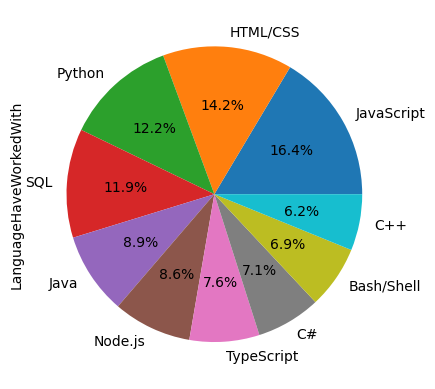

In [ ]:
# DevType, LanguageHaveWorkedWith, OpSys, Age, Gender  - 내가 생각한 5개 컬럼
# Age, Country, LanguageHaveWorkedWith, LearnCode - 강사님 ver.
# 일단 강사님 걸로 따라가다 내가 생각한건 따로 한번 ㄱㄱ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/survey_results_public.csv')
df.head()

# 필요한 열만 추출
survey = df[['Age','Country', 'LanguageHaveWorkedWith', 'LearnCode']]
survey.head()

# 특정 열 데이터 조회 - 개발자의 연령대 정보 확인
survey['Age'].value_counts()
survey['Age'].drop_duplicates()   # 중복값 삭제

# 데이터 그룹별 크기 구하기(연령대별 응답숫자 확인)
survey.groupby(['Age'])
size_age = survey.groupby(['Age']).size()
size_age

# 위와 동일한 방식으로 국가별 응답 숫자 구하기
survey.groupby(['Country'])
size_country = survey.groupby(['Country']).size()
size_country = size_country.sort_values(ascending=False)

# 선 그래프
# size_age.plot.line(rot=45)  # rot 없으면 겹쳐서 나타남

# 막대 그래프
# size_age.plot.bar()

# 막대 그래프(가로)
# size_age.plot.barh()


# 그룹 이름(색인) 순서 변경하기
# 연령대 가장 낮은 Under 18 years old 가 제일 위, Prefer not to say가 제일 아래
size_age.index
reindxed_size_age = size_age.reindex(index=[
    'Prefer not to say',
    '65 years or older',
    '55-64 years old',
    '45-54 years old',
    '35-44 years old',
    '25-34 years old',,
    '18-24 years old',
    'Under 18 years old'
    ])
reindxed_size_age
# reindxed_size_age.plot.barh()

# 오후 부분

# 국가별 응답자수 파이 그래프로 그리기
# size_country.plot.pie(rot=45, autopct='%.2f%%')  # autopct -> 파이그래프에서 퍼센트 표현할 때 사

# 위 결과 실행하면 국가 알아보기 어려우므로 상위 20개만 추려냄
# size_country.plot.pie(figsize=(10,10))  -> 사이즈 크기 키우는것
# size_country[:20].plot.pie(autopct='%.2f%%')  - 내가 한 ver.
# size_country.nlargest(20).plot.pie()  # 강사님 ver.

# 프로그래밍별 응답수 확인하기
language = survey['LanguageHaveWorkedWith']
language = language.str.split(';')  # str 빼먹어서 못함
lang = language.explode()  # explode() -> 리스트 항목을 행으로 만들때 사용
lang.value_counts(ascending=False)

# 위 결과 파이 그래프로 표현
lan = lang.value_counts()
# lan.plot.pie(autopct='%.1f%%')

# 상위 10개 데이터만 파이로 표현
# lan.nlargest(10).plot.pie(autopct='%.1f%%')

# 강사님 ver.
'''size_language = lang.groupby(lang).size()
size_language.nlargest(10).plot.pie(autopct='%.1f%%')'''



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<Axes: ylabel='quantity'>

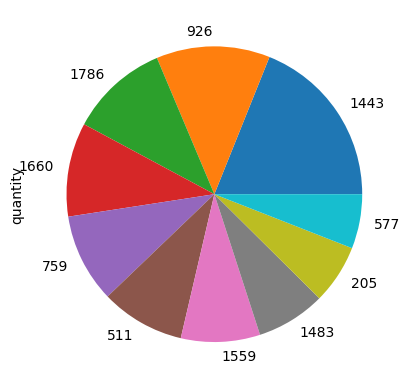

In [ ]:
# 레스토랑 파일 전처리
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/chipotle.tsv',sep='\t')  # tsv 파일 읽는 방법
df.drop('choice_description',axis=1)
df['item_price'] = df['item_price'].str.replace('$', '',regex=True)
df['item_price'] = pd.to_numeric(df['item_price'])

 # 가장 많이 팔린 메뉴 top 10
# menu = df.groupby("item_name")["quantity"].sum().nlargest(10)
# menu.plot.barh()

# 가장 많은 매출의 메뉴 top 10
# df['item_price'] = df['item_price'].str.replace('$', '',regex=True)
# high = df.groupby('item_name')['item_price'].agg('sum').nlargest(10)
# high.plot.barh()

# 주문액이 가장 큰 고객(주문 번호당 총 금액) - boxplot
price = df.groupby('order_id')['item_price'].sum()
# price.plot.box()

# 고객별 주문횟수 비율 (파이 그래프) - 상위 20
rate = df['order_id'].value_counts()
# rate.nlargest(10).plot.pie(autopct='%.1f%%')

# 주문 당 주문 메뉴 개수
order_rate = df.groupby('order_id')['quantity'].sum()
order_rate.nlargest(10).plot.pie()